In [180]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.3)
import pandas as pd
import warnings
import sys

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [181]:
from combine_placecells import GetData, PlotPCs

In [182]:
DataFolder = '/home/sheffieldlab/Desktop/NoReward/ImagingData/Good_behavior/Dataused/'
CombinedDataFolder = '/home/sheffieldlab/Desktop/NoReward/ImagingData/Good_behavior/Dataused/PlaceCellResults_All/'
SaveFiguresFolder ='/home/sheffieldlab/Desktop/NoReward/PaperFigures/Figure3/'

In [183]:
gd = GetData(DataFolder, CombinedDataFolder)

## Remapping and Place cells

Task1 (756, 40)
Task2b (496, 40)
Task3 (850, 40)
Task4 (735, 40)


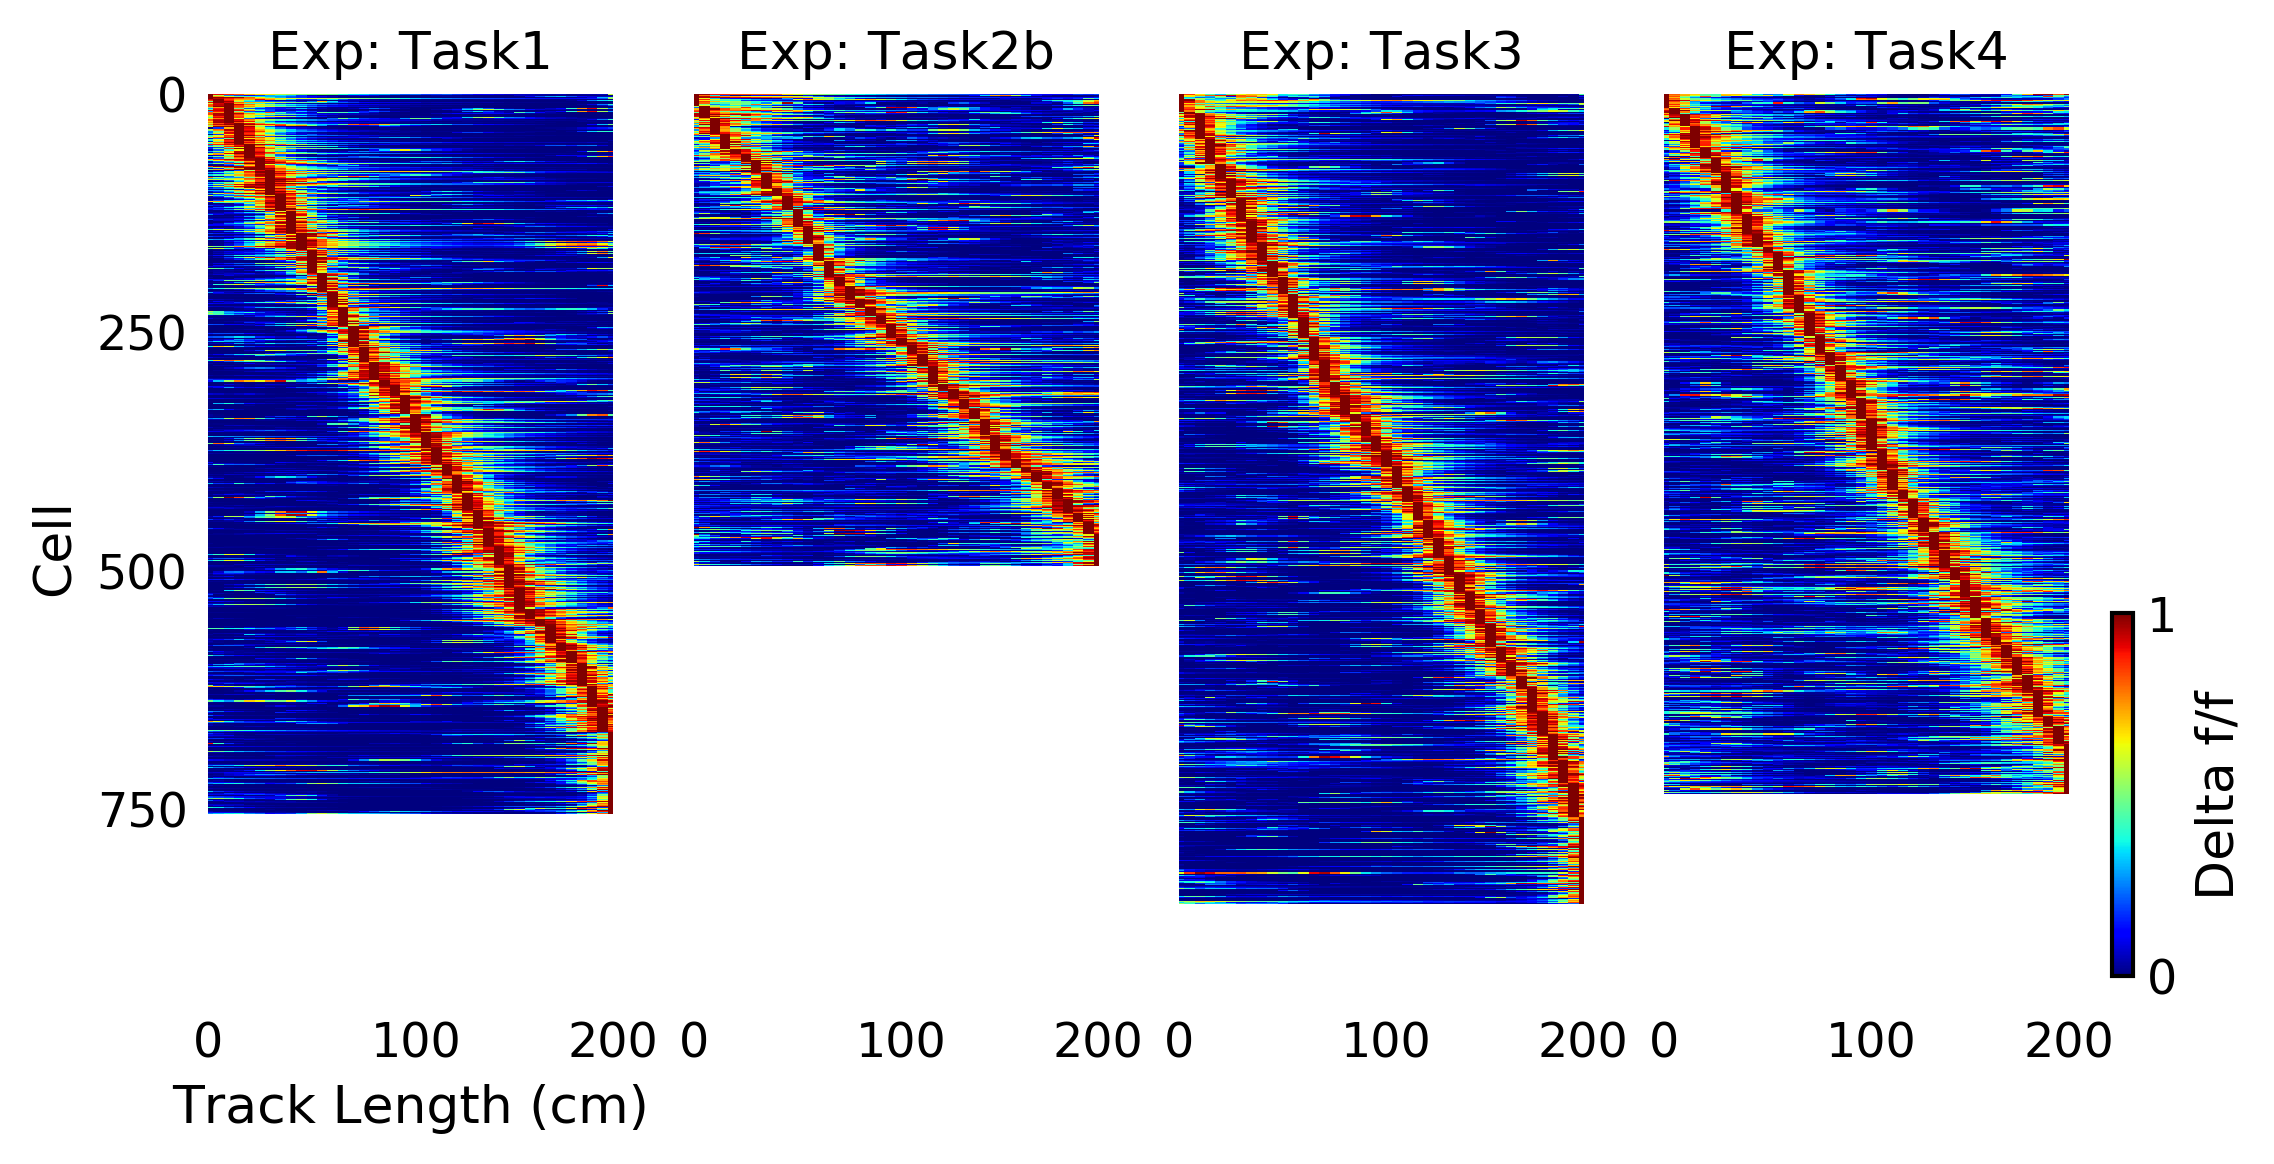

In [184]:
fs, ax = plt.subplots(1, 4, sharex='all', dpi=300)
numcell_tasks = gd.combine_placecells_pertask(fs, 
    ax, taskstoplot=['Task1', 'Task2b', 'Task3', 'Task4'])
for n, a in enumerate(ax):
    a.set_ylim((950, 0))
    sns.despine(right=True, top=True, left=True, bottom=True, ax=a)
    if n > 0:
        a.set_yticklabels('')
fs.set_size_inches((8, 4))
fs.savefig(os.path.join(SaveFiguresFolder, 'Placecells_pertask_heatmap.pdf'),  bbox_inches='tight', transparent=True)

## Remapping in same task

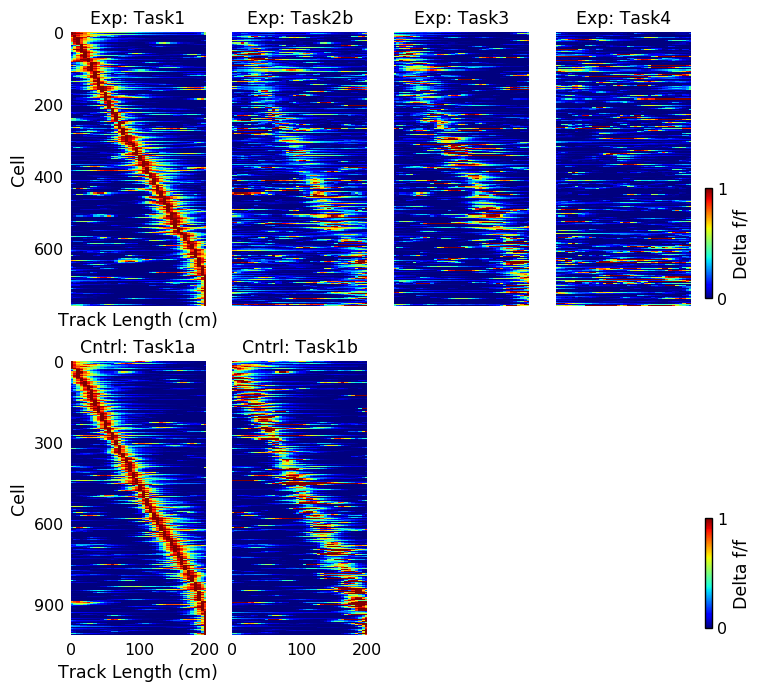

In [441]:
fs, ax = plt.subplots(2, 4, sharex='all', sharey='row', dpi=100)
c_exp, pc_activity_exp, pc_sorted_exp = gd.combine_placecells_withtask(fs, ax[0, :], taskstoplot=['Task1', 'Task2b', 'Task3', 'Task4'])


ControlFolder = '/home/sheffieldlab/Desktop/NoReward/ControlData/Dataused/'
c_cntrl, pc_activity_cntrl, pc_sorted_cntrl = gd.combine_control_placecells(fs, ax[1, :], ControlFolder, taskstoplot=['Task1a', 'Task1b'], controlflag=1)

for a in ax.flatten():
    sns.despine(right=True, top=True, left=True, bottom=True, ax=a)

for a in ax[1, -2:]:
    a.axis('off')
        

fs.set_size_inches((8, 8))
fs.savefig(os.path.join(SaveFiguresFolder, 'Remapping_withTask1_heatmap.pdf'),  bbox_inches='tight', transparent=True)

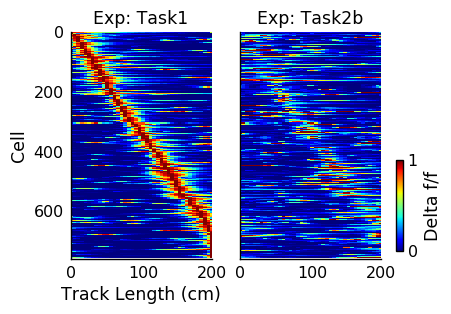

In [523]:
fs, ax = plt.subplots(1, 2, sharex='all', sharey='row', dpi=100)
c_exp, pc_activity_exp, pc_sorted_exp = gd.combine_placecells_withtask(fs, ax, taskstoplot=['Task1', 'Task2b'])
fs.set_size_inches((4, 3))
fs.savefig(os.path.join(SaveFiguresFolder, 'Remapping_withTask1_forChad.pdf'),  bbox_inches='tight', transparent=True)

## Look at parameters across track

In [185]:
from combine_placecells import TrackParams

In [186]:
track_exp = TrackParams(pc_activity_exp)
c_exp = track_exp.trackcorrelation()
track_cntrl = TrackParams(pc_adectivity_cntrl)
c_cntrl = track_cntrl.trackcorrelation(basetask='Task1a')

[ 1.  4.  7. 10. 13. 16. 19. 22. 25. 28. 31. 34. 37. 40.]
[ 1.  4.  7. 10. 13. 16. 19. 22. 25. 28. 31. 34. 37. 40.]


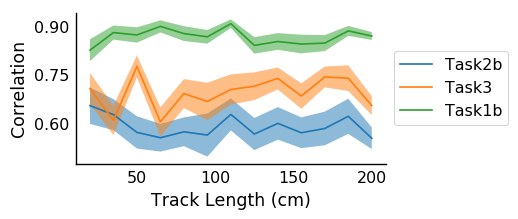

In [274]:
fs, ax = plt.subplots(1, dpi=100)
track_exp.get_track_com_percell(ax, c_exp, 'Task1', ['Task2b', 'Task3'], pvalueflag=1)
track_cntrl.get_track_com_percell(ax, c_cntrl, 'Task1a', ['Task1b'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fs.set_size_inches((4, 2))
fs.savefig(os.path.join(SaveFiguresFolder, 'correlationacrosstrack.pdf'),  bbox_inches='tight', transparent=True)

Task1 with Task2b : 0.000
Task1 with Task3 : 0.000
Task1 with Task4 : 0.000


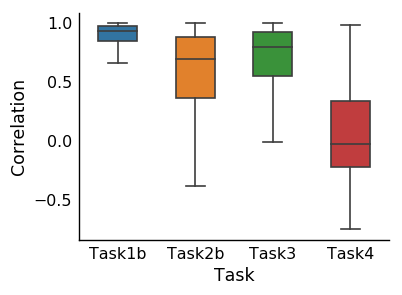

In [249]:
fs, ax = plt.subplots(1, dpi=100)
PlotPCs.plot_barplot_correlation(ax, c_cntrl, c_exp)
fs.set_size_inches((4, 3))
fs.savefig(os.path.join(SaveFiguresFolder, 'Placecells_remapping_correlation.pdf'),  bbox_inches='tight', transparent=True)

## Clustering

In [443]:
corr_exp = PlotPCs.heirarchical_clustering(pc_activity_exp, pc_sorted_exp, taskstoplot=['Task1', 'Task2b', 'Task3'], basetask='Task1')

In [444]:
corr_cntrl = PlotPCs.heirarchical_clustering(pc_activity_cntrl, pc_sorted_cntrl, taskstoplot=['Task1a', 'Task1b'], basetask='Task1a')

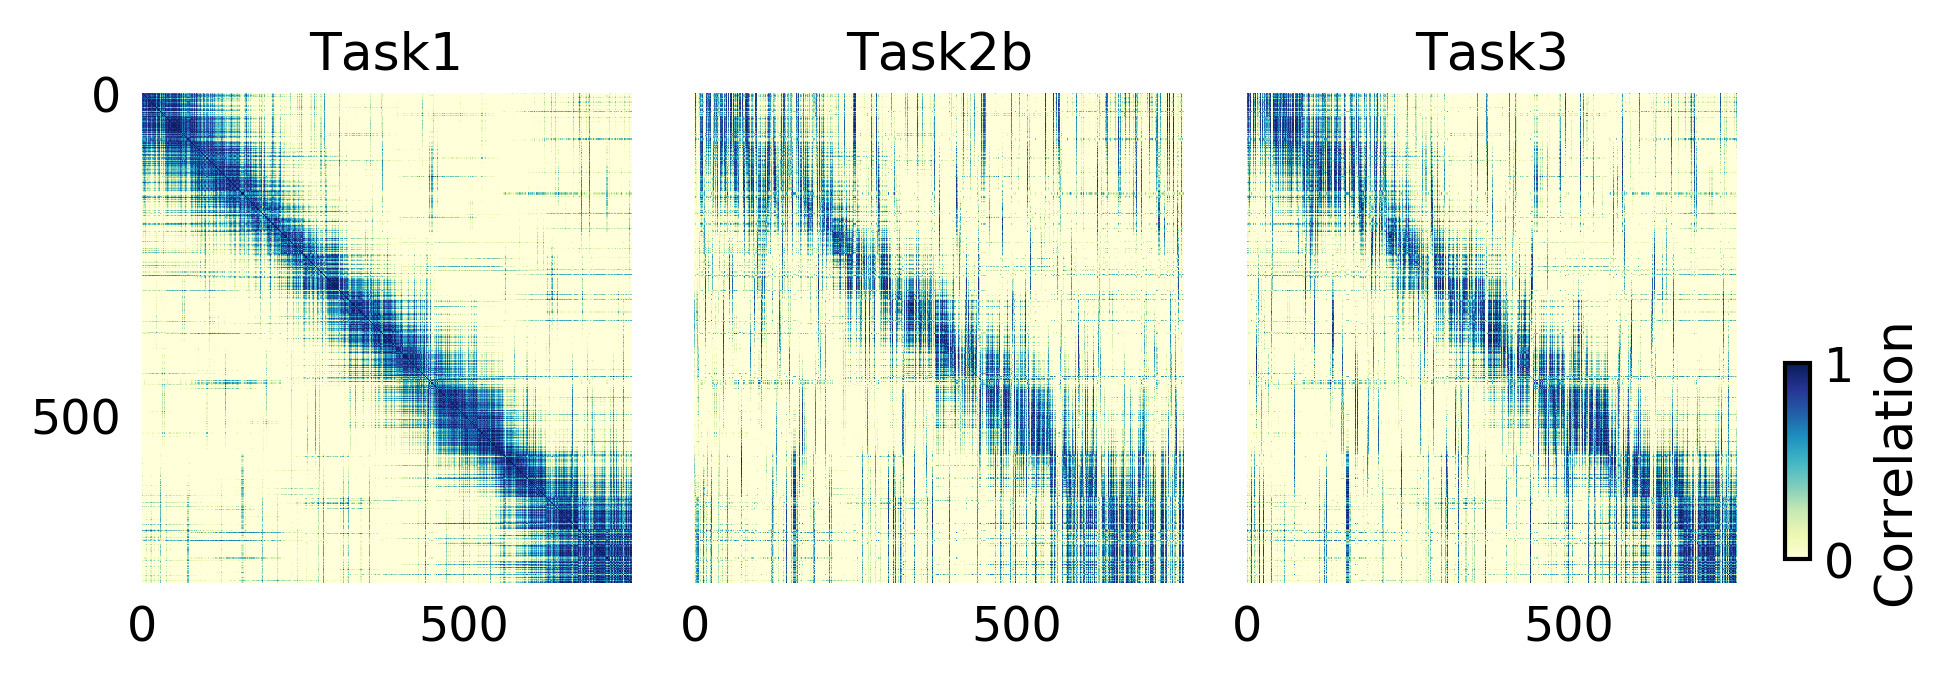

In [504]:
fs, ax = plt.subplots(1, 3, dpi=300, sharex='all', sharey='all')

for n, t in enumerate(['Task1', 'Task2b', 'Task3']):
    img = ax[n].imshow(corr_exp[t], cmap='YlGnBu', vmin=0,
                       vmax=1, interpolation='nearest')
    ax[n].set_title(t)
caxis = PlotPCs.add_colorbar_as_inset(ax[2])
cb = fs.colorbar(img, cax=caxis, pad=0.2, ticks=[0, 1])
cb.set_label('Correlation', rotation=90)
cb.ax.tick_params(size=0)
for a in ax:
    sns.despine(right=True, top=True, left=True, bottom=True, ax=a)
    a.tick_params(axis='both', pad=5, length=0)
    a.locator_params(nbins=2)
fs.tight_layout()
fs.savefig(os.path.join(SaveFiguresFolder, 'Correlationheatmap.pdf'),  bbox_inches='tight', transparent=True)

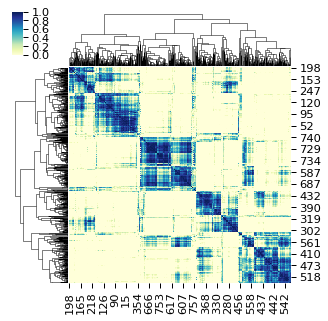

In [507]:
cg = sns.clustermap(corr_exp['Task1'], cmap ="YlGnBu", 
                    vmin=0, vmax=1, figsize=(5, 5))

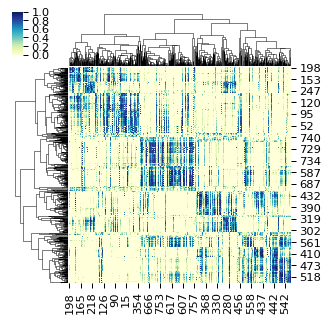

In [508]:
sns.clustermap(corr_exp['Task2b'], cmap ="YlGnBu", 
                    vmin=0, vmax=1, figsize=(5, 5), 
                    row_linkage=cg.dendrogram_row.linkage,
                   col_linkage=cg.dendrogram_col.linkage)

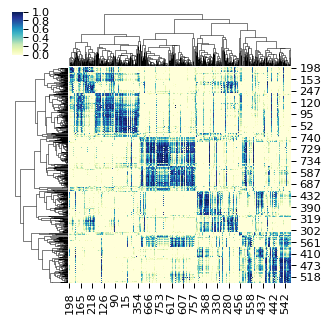

In [509]:
sns.clustermap(corr_exp['Task3'], cmap ="YlGnBu", 
                    vmin=0, vmax=1, figsize=(5, 5), 
                    row_linkage=cg.dendrogram_row.linkage,
                   col_linkage=cg.dendrogram_col.linkage)


### COM for same place cells

NR6_placecellparams_df.csv
NR21_placecellparams_df.csv
NR14_placecellparams_df.csv
CFC4_placecellparams_df.csv
NR24_placecellparams_df.csv
NR23_placecellparams_df.csv


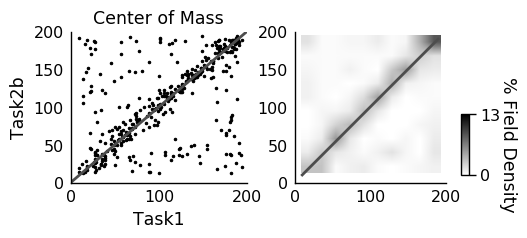

In [516]:
fs, ax = plt.subplots(1, 2, dpi=100)
a1 = gd.get_com_allanimal(fs, ax, taskA='Task2b', taskB='Task1', vmax=13)
fs.set_size_inches((5, 2))

NR6_placecellparams_df.csv
NR21_placecellparams_df.csv
NR14_placecellparams_df.csv
CFC4_placecellparams_df.csv
NR24_placecellparams_df.csv
NR23_placecellparams_df.csv


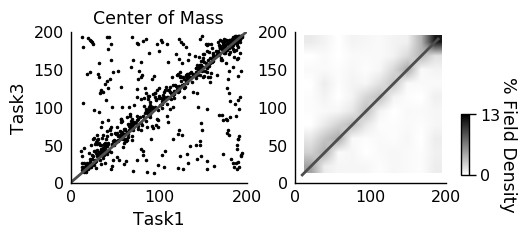

In [517]:
fs, ax = plt.subplots(1, 2, dpi=100)
a2 = gd.get_com_allanimal(fs, ax, taskA='Task3', taskB='Task1', vmax=13)
fs.set_size_inches((5, 2))